#### ORB : An efficient alternative to SIFT or SURF. ICCV 2011

In [1]:
import cv2           # OpenCV (Open Source Computer Vision Library) it provides tools for computer vision taskes
                       # includes image and video processing, feature extraction, object detection, machine learning
import os              
from PIL import Image   #python image liberary 
from matplotlib import pyplot as plt
from sklearn.model_selection import cross_val_score
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score ,log_loss , confusion_matrix ,roc_curve, auc
from sklearn.preprocessing import label_binarize
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import random
import tensorflow as tf
from sklearn.metrics import accuracy_score, log_loss

In [2]:
# Write the Path of Your folder which contains Folderes that have images ,each name of these folders acts as the name of class (The images class name)
# Project_datasets here for example contains folders(AA,BB,CC) which contain images , so the first class name is AA for the first images class and BB for the second
class_directory = "C:\\Users\\Abdelrahman tawfik\\Desktop\\jupyter\\ML Project\\Project\\Image_classification and Clustring\\Project_datasets"

# Initialize ORB detector
orb = cv2.ORB_create()
all_keypoints = []      # To collect all keypoints for each image and and also all the below lists 
all_discriptors = []
all_labels = []
all_images = []
invalid_images_names = []
class_names=[]

# let's load all images !

The image which has neither descriptors or keypoints : 
Image keypoints :  ()
Image descriptors :  None


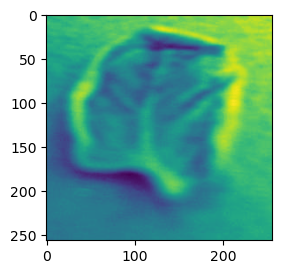



The image which has neither descriptors or keypoints : 
Image keypoints :  ()
Image descriptors :  None


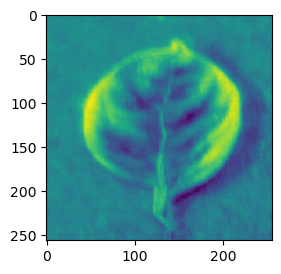

In [3]:
for class_name in os.listdir(class_directory):                                             #lists all folders in the specified directory. (The Class names)
    class_names.append(class_name)
    class_path = os.path.join(class_directory,class_name)
    for file_name in os.listdir(class_path):                                               #lists all files in the specified directory. (the images)
        if  file_name.endswith((".JPG",".jpg")):
            image_path = os.path.join(class_path,file_name)                                # Construct the full file path (image path)
            image = cv2.imread(image_path)                                                 #load the image
            #Input Image (BGR): Each pixel has three values (Blue, Green, Red).
            #Output Image (Grayscale): Each pixel has a single value representing the intensity.
            if image is not None:                                                          #check if the image is loaded 
                gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)                       # Convert the image to grayscal(BGR to(2) grayscal)
                keypoints ,descriptors = orb.detectAndCompute(gray_image, None)            # Detect keypoints and compute the discriptors NONE means keypoint detection is performed over the entire image
                if descriptors is None or keypoints is None:                               #checik if the keypoints and descriptors has no values
                    print("The image which has neither descriptors or keypoints : ")
                    print("Image keypoints : ",keypoints)
                    print("Image descriptors : ",descriptors)
                    plt.subplot(121), plt.imshow(gray_image),plt.show()                    # Show these invalid images and print its keypoints and descriptors
                    invalid_images_names.append(file_name)
                    print("\n")
                else:
                    all_keypoints.append(keypoints)
                    all_discriptors.append(descriptors)
                    label = os.path.basename(os.path.dirname(image_path))  
                    all_labels.append(label)
                    all_images.append(gray_image)
        else:
            invalid_images_names.append(file_name)

In [4]:
# Print the classe names
for i in range (len(class_names)):
    print(class_names[i])

Pepper__bell___healthy
Potato___Early_blight
Tomato__YellowLeaf__Curl_Virus


In [5]:
print(f"Number of image discriptors : {len(all_discriptors)}")
print(f"Number of image keypoints : {len(all_keypoints)}")
print(f"Number of image labels : {len(all_labels)}")
print(f"Number of Valid image : {len(all_images)}")
print(f"Number of invalid image : {len(invalid_images_names)}")

Number of image discriptors : 2998
Number of image keypoints : 2998
Number of image labels : 2998
Number of Valid image : 2998
Number of invalid image : 2


In [6]:
# Get the invalid images name if there is 
if len(invalid_images_names):
    for i in range(len(invalid_images_names)):
        print(f"Invalid image name number {i} : ",invalid_images_names[i],"\n")

Invalid image name number 0 :  61956cbd-f717-4785-aa37-05f3a369c968___UF.GRC_YLCV_Lab 02394.JPG 

Invalid image name number 1 :  685af008-4141-4707-8caa-67e21fbd17d9___UF.GRC_YLCV_Lab 02035.JPG 



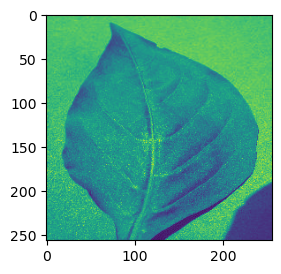


Image descriptors : 

 [[ 54 201 194 ...  63 246  10]
 [ 72 233  24 ...   4 139  11]
 [134 224 241 ... 139 149 241]
 ...
 [128  59 156 ...  96 135 147]
 [194 172 191 ...  64 165 107]
 [128 220 158 ...  80 133  91]]

Image keypoints : 

 (< cv2.KeyPoint 00000278BF1D83C0>, < cv2.KeyPoint 00000278BF1D8390>, < cv2.KeyPoint 00000278BF1D83F0>, < cv2.KeyPoint 00000278BF1D8420>, < cv2.KeyPoint 00000278BF1D8450>, < cv2.KeyPoint 00000278BF1D8480>, < cv2.KeyPoint 00000278BF1D84B0>, < cv2.KeyPoint 00000278BF1D84E0>, < cv2.KeyPoint 00000278BF1D8510>, < cv2.KeyPoint 00000278BF1D8540>, < cv2.KeyPoint 00000278BF1D8570>, < cv2.KeyPoint 00000278BF1D85A0>, < cv2.KeyPoint 00000278BF1D85D0>, < cv2.KeyPoint 00000278BF1D8600>, < cv2.KeyPoint 00000278BF1D8630>, < cv2.KeyPoint 00000278BF1D8660>, < cv2.KeyPoint 00000278BF1D8690>, < cv2.KeyPoint 00000278BF1D86C0>, < cv2.KeyPoint 00000278BF1D86F0>, < cv2.KeyPoint 00000278BF1D8720>, < cv2.KeyPoint 00000278BF1D8750>, < cv2.KeyPoint 00000278BF1D8780>, < cv2.KeyPoin

In [7]:
#Display the keypoints and descriptors of third image 
plt.subplot(121), plt.imshow(all_images[3]),plt.show()
print("\nImage descriptors : \n\n",all_discriptors[3])
print("\nImage keypoints : \n\n",all_keypoints[3])

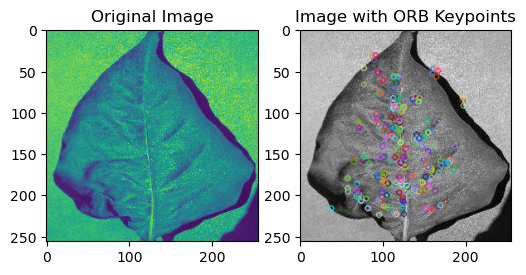

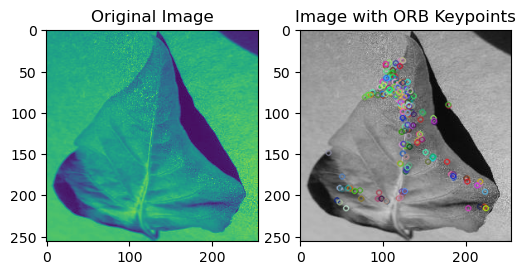

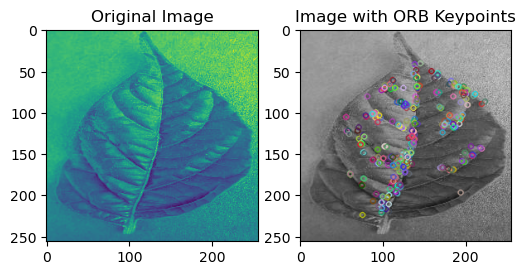

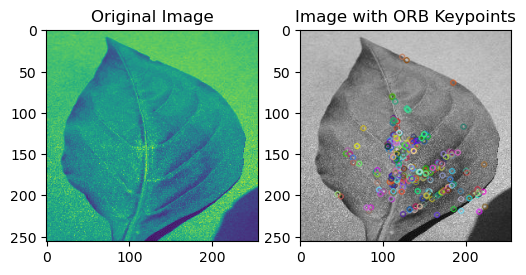

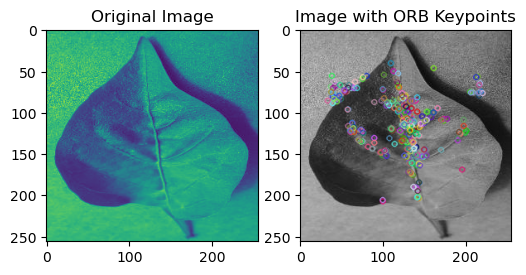

In [8]:
#display the Keypoints on the 5 original images
for i in range (5):
    # Visualize ORB keypoints on the image
    image_with_keypoints = cv2.drawKeypoints(all_images[i], all_keypoints[i], None)
    # Display the keypoints on the original point 
    plt.figure(figsize=(6, 3))
    plt.subplot(121), plt.imshow(all_images[i]), plt.title('Original Image')
    plt.subplot(122), plt.imshow(image_with_keypoints), plt.title('Image with ORB Keypoints')
    plt.show()

In [9]:
# Shuffle the all lists to enhance the accuracy of the classifier
# This shuffling method converts all lists to <class 'tuple'> type
combined_data = list(zip(all_discriptors, all_labels,all_images,all_keypoints))
random.shuffle(combined_data)
shuffled_descriptors, shuffled_labels, shuffled_images, shuffled_keypoints = zip(*combined_data)

    Class : Tomato__YellowLeaf__Curl_Virus


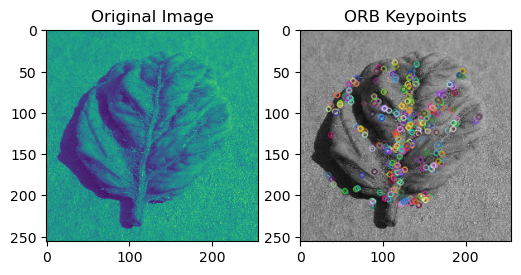

    Class : Tomato__YellowLeaf__Curl_Virus


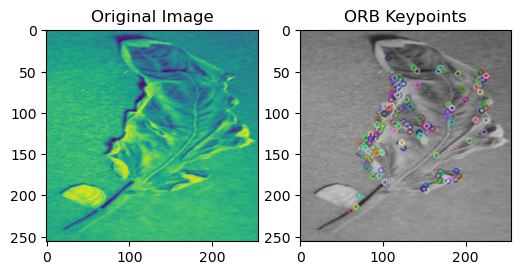

    Class : Tomato__YellowLeaf__Curl_Virus


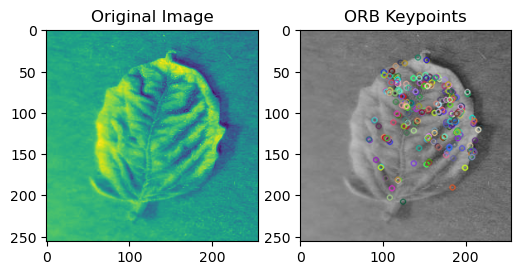

    Class : Tomato__YellowLeaf__Curl_Virus


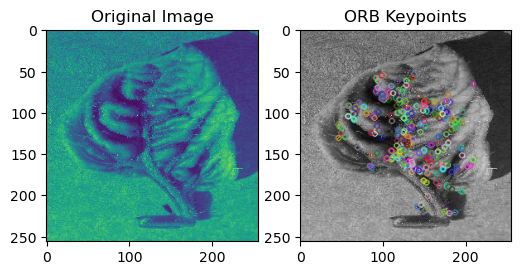

    Class : Pepper__bell___healthy


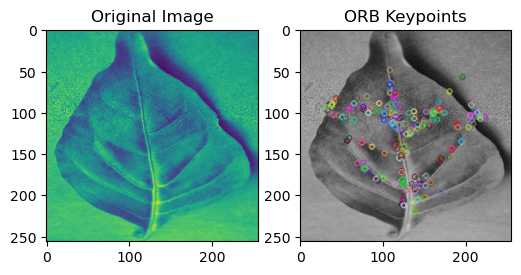

In [10]:
#display the Keypoints on the first 5 original images after shuffling 
for i in range (5):
    # Visualize ORB keypoints on the image
    image_with_keypoints2 = cv2.drawKeypoints(shuffled_images[i], shuffled_keypoints[i], None)
    print(f"    Class : {shuffled_labels[i]}")                                                   # display it's label(class)
    plt.figure(figsize=(6, 3))                                                                   # Drow them
    plt.subplot(121), plt.imshow(shuffled_images[i]), plt.title('Original Image')
    plt.subplot(122), plt.imshow(image_with_keypoints2), plt.title('ORB Keypoints')
    plt.show()

In [11]:
# To check if all the image has it's True Keypoints and label
print(f"Number of image discriptors : {len(shuffled_descriptors)}")
print(f"Number of image keypoints : {len(shuffled_keypoints)}")
print(f"Number of image labels : {len(shuffled_labels)}")
print(f"Number of Valid image : {len(shuffled_images)}")

Number of image discriptors : 2998
Number of image keypoints : 2998
Number of image labels : 2998
Number of Valid image : 2998


In [12]:
# Convert the labels to numerical values
label_mapping = {label: i for i, label in enumerate(np.unique(shuffled_labels))}
all_labels_numeric = np.array([label_mapping[label] for label in shuffled_labels])

In [13]:
# Pad all_descriptors to a fixed lenght
padded_discriptors=pad_sequences(shuffled_descriptors, maxlen=750, padding='post' ,truncating='post' ,dtype= 'float32' )

In [14]:
# using NumPy's reshape function to transform a multi-dimensional array into a two-dimensional array 
# Multi_demensional (which gonna be converted) is assumed to be a multi-dimensional NumPy array to success the conversion 
flattened_discriptors = padded_discriptors.reshape((len(padded_discriptors), -1))     #This tuple specifies the target shape of the array in the first dimension and the second
# -1 it means that the size of that dimension (second dimension) is inferred based on the size of the array and the other specified dimensions

In [15]:
# To checik if the number of flattened discriptors is the same of the number of shuffled 
print(f"Number of flattened discriptors : {len(flattened_discriptors)}")

Number of flattened discriptors : 2998


In [16]:
# Convert the all_discriptors list to numpy array 
X = np.array(flattened_discriptors)                       #To covert it must all the dimensions has the same sizeeeeeeeeee  {ERROR}
y = all_labels_numeric 

In [17]:
# Check if each feature has it's label(Target)
print(f"Number of image discriptors : {len(X)}")
print(f"Number of Labels : {len(y)}")

Number of image discriptors : 2998
Number of Labels : 2998


# let's start training the model !

In [18]:
# Split Test and Target Datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
# Scale the Feature to small scall to improve the performance 
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [20]:
# Intialize the model
logistic = LogisticRegression(multi_class='multinomial', solver='lbfgs' ,max_iter=2000)

In [21]:
# Train the model
logistic.fit(X_train,y_train)

LogisticRegression(max_iter=2000, multi_class='multinomial')

In [22]:
# Check the number of iterations in order to achieve conversion in training phase 
print("Convergence Info:", logistic.n_iter_)

Convergence Info: [440]


In [23]:
# test the model to calculate the accuracy
y_pred = logistic.predict(X_test)
y_pred_proba = logistic.predict_proba(X_test)       #generate the predicted probabilities for each class (or label) for each sample

# Accuracy Score

In [24]:
# Calculate the accuracy 
accuracy = accuracy_score(y_test,y_pred)
print(f"The accuracy : {accuracy}")

The accuracy : 0.7816666666666666


# Log score

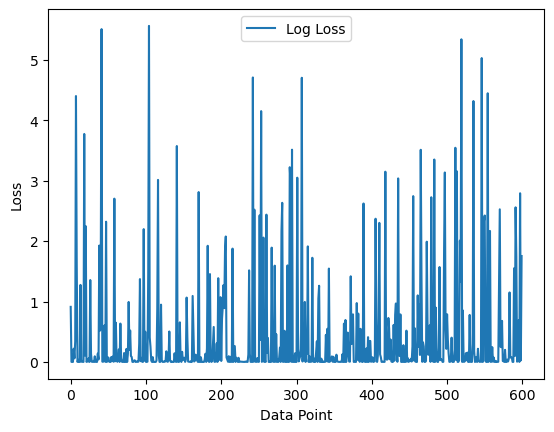

In [25]:
# Calculate log loss 
#  Loss curve referred to as the training loss curve (loss function) and The goal during training is to minimize this loss J(O)
loss_values = []
for i in range(len(y_test)):
    true_label = np.zeros(len(label_mapping))
    true_label[y_test[i]] = 1
    loss = log_loss(true_label, y_pred_proba[i])
    loss_values.append(loss)

# Plotting the loss curve
plt.plot(loss_values, label='Log Loss')
plt.xlabel('Data Point')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Confusion Matrix

Confusion Matrix:
[[159   7  36]
 [  8 191   6]
 [ 44  30 119]]


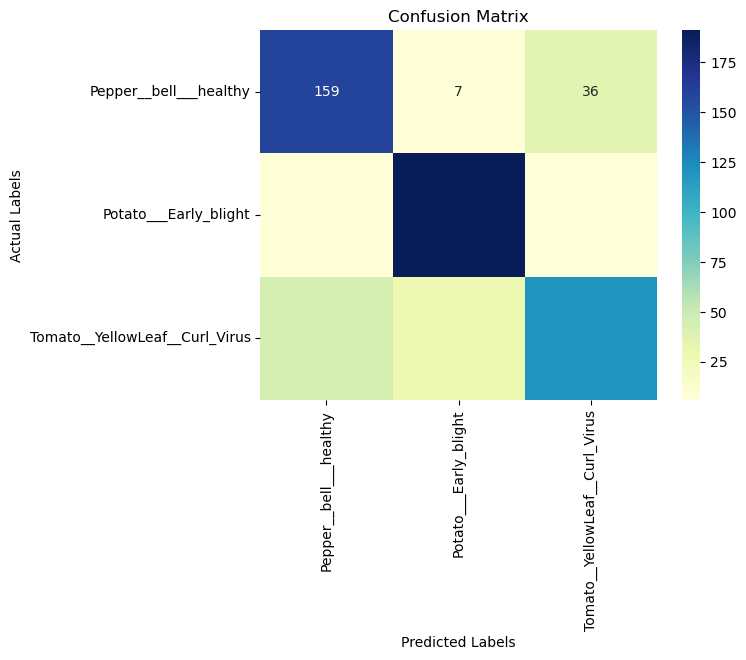

In [28]:
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)
# Visualize the confusion matrix using a heatmap
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="YlGnBu", xticklabels=class_names, yticklabels=class_names)    # Class name list containts the names of the classes
# Add labels and title
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.title("Confusion Matrix")
plt.show()

# ROC curve

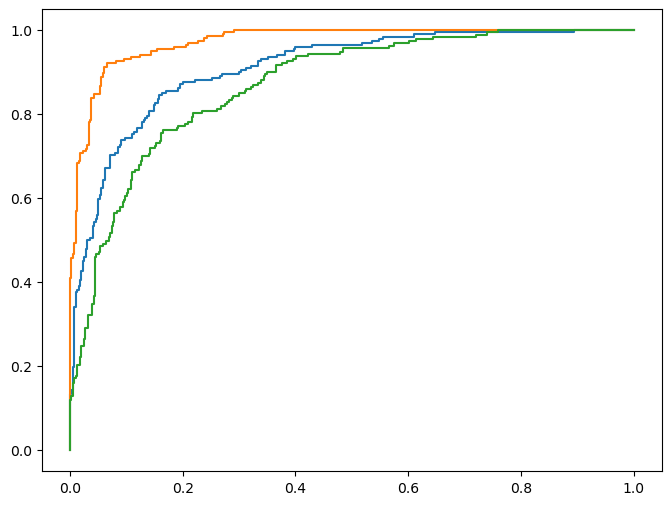

In [27]:
# Binarize the labels for the ROC curve
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))                  #is used to convert the true labels into binary format for the ROC curve.
# Compute ROC curve and ROC area for each class
#plots the True Positive Rate (sensitivity) against the False Positive Rate (1 - specificity) for various threshold values.
# Threshold values convert the continuous probability scores produced by a model into binary predictions. In the context of a binary classification problem, these probability scores can be compared to a threshold to determine the predicted class.
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(np.unique(y_test))):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_proba[:, i])          # Roc_curve computes the ROC curve for each class.
    roc_auc[i] = auc(fpr[i], tpr[i])                                             # Auc  calculates the area under the ROC curve for each class

# Plot ROC curves
plt.figure(figsize=(8, 6))
for i in range(len(np.unique(y_test))):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')